## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#Conclusion)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [54]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [55]:
df = pd.read_csv('ab_data.csv') 
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [56]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [57]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [58]:
df.query("converted == '1'").user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [59]:
df.query("group != 'treatment' and landing_page == 'new_page' or group == 'treatment' and landing_page != 'new_page' " ).shape[0]

3893

f. Do any of the rows have missing values?

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [61]:
df.query("group == 'treatment' and landing_page == 'new_page' or group == 'control' and landing_page == 'old_page'" ).shape[0]

290585

In [62]:
df_del=df.query("group != 'treatment' and landing_page == 'new_page' or group == 'treatment' and landing_page != 'new_page' " )
df_del.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [63]:
df2=df.copy()

In [64]:
df2.drop(df_del.index,inplace=True)

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [66]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [67]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [68]:
dup=df2[df2.user_id.duplicated()]
dup

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [69]:
dup.landing_page

2893    new_page
Name: landing_page, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [70]:
df2.drop_duplicates('user_id', inplace=True)

In [71]:
df2.user_id.duplicated().sum()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [72]:
#df2.loc[[2893]]

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [73]:
df2.query("converted == '1'").shape[0]/df2.converted.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [74]:
df2.query("converted == '1' and group == 'control'").shape[0]/df2.query("group == 'control'").shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [75]:
df2.query("converted == '1' and group == 'treatment'").shape[0]/df2.query("group == 'treatment'").shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [76]:
df2.query("landing_page == 'new_page'").shape[0]/df2.converted.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Since percentage of page conversion in control group "12.1%" higher than the percentage of page conversion in treatment group "11.9%" which is so close. This is not sufficient evidence to conclude that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} =< p_{old} $$

$$H_1: p_{new} > p_{old} $$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [77]:
p_new=df2.query("converted == '1'").user_id.nunique()/df2.user_id.nunique()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [78]:
p_old= df2.query("converted == '1'").user_id.nunique()/df2.user_id.nunique()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [79]:
n_new=df2[df2['group']=="treatment"].shape[0]
n_new


145310

d. What is $n_{old}$, the number of individuals in the control group?

In [80]:
n_old=df2[df2['group']=="control"].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

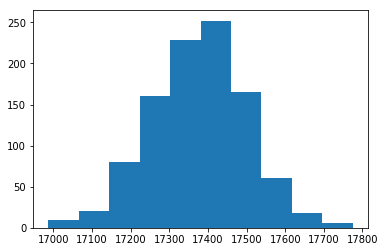

In [81]:
new_page_converted = np.random.binomial(n_new, p_new, size=1000)
#new_page_converted
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

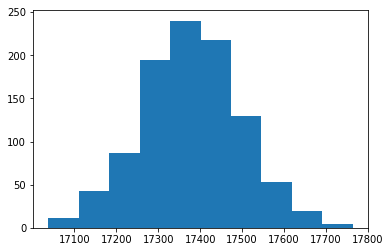

In [82]:
old_page_converted= np.random.binomial(n_old, p_old,size =1000)
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

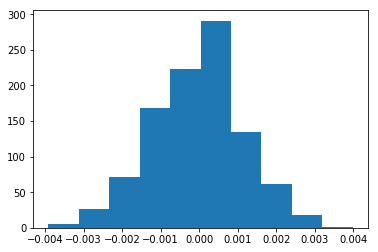

In [83]:
conv_diff=new_page_converted/n_new - old_page_converted/n_old # observed difference
plt.hist(conv_diff);


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [84]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted= np.random.binomial(n_old, p_old)
    conv_diff=new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(conv_diff)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

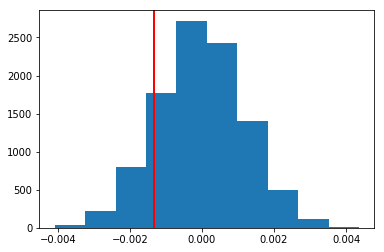

In [85]:
plt.hist(p_diffs);
plt.axvline(conv_diff,c='r',linewidth = 2);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [86]:
conv_new=df2[df2['group']=="treatment"]['converted'].mean()
conv_old=df2[df2['group']=="control"]['converted'].mean()
print(conv_new-conv_old)# that means conversion mean of new page is worse than old page with this much

-0.00157823898536


In [87]:
#proportion of p_diffs are greater than the actual difference observed.
act_diff=conv_new-conv_old
(p_diffs > act_diff).mean() 

0.89759999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

What we calculated was the "p value" which helps us to make a decision regarding observing our statistics to choose the alternative hypothesis or choosing the null hypothesis. Here our P value is large which makes us failed to reject the null hypothesis. This means old page has a better conversion than the new one.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [88]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2.query("converted == '1' and group == 'control'").shape[0]
convert_new = df2.query("converted == '1' and group == 'treatment'").shape[0]
n_old = df2[df2['group']=="control"].shape[0]
n_new = df2[df2['group']=="treatment"].shape[0]

In [89]:
print(convert_old,convert_new);
print(n_old,n_new);

17489 17264
145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [90]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

since P_value is still the same, it make us failed to reject the null again. which makes the conversion on the old page is better than the conversion on the new page. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

It's a logistic regression since we have 0 or 1 result "conversion or no conversion".

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [91]:
df2['intercept'] = 1
df2[['control','treatment']] = pd.get_dummies(df2.group)

In [92]:
df2.head() #added in control new column 1 if origional control and otherwise it's 0 "origionally treatment" in group.

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [93]:
import statsmodels.api as sm
from scipy import stats

stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)

logit_mod= sm.Logit(df2['converted'], df2[['intercept','treatment']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        11:17:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

since p_value is different in the logistic regression model "0.19" than p_value in part||, that means we performed one-sided test in part ||, but in the logistic regression model part |||, it is two-sided test.
In both cases we still can't fail null hypothises.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding other factors will be a good thing surely to get more accurate decision such as age of these page users, country and different users behiover on the site. But there's an a disadvantage of adding more factors as the complexity as well as Simpson's paradox theory of regression model as the combined impact of different variables disappears or reverses when these variables are combined, and it appears where these variables are tested individually.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [95]:
countries_df= pd.read_csv('countries.csv')
df_new= countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [96]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [97]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [98]:
#create dummies variables
df_new[['US','UK']]=pd.get_dummies(df_new.country)[['US','UK']]

In [104]:
#interaction between page and country for US & UK
df_new['US_new'] = df_new['US'] * df_new['treatment']
df_new['UK_new'] = df_new['UK'] * df_new['treatment']

In [100]:
df_new.sample(6)

,country,timestamp,group,landing_page,converted,intercept,control,treatment,US,UK,US_new,UK_new
user_id,,,,,,,,,,,,
703821,US,2017-01-20 03:20:54.055774,control,old_page,0,1,1,0,1,0,0,0
927767,US,2017-01-20 01:20:04.740736,control,old_page,1,1,1,0,1,0,0,0
925092,UK,2017-01-09 09:19:07.492044,treatment,new_page,1,1,0,1,0,1,0,1
702639,UK,2017-01-06 07:43:28.302032,treatment,new_page,0,1,0,1,0,1,0,1
878266,CA,2017-01-23 20:53:09.678211,treatment,new_page,0,1,0,1,0,0,0,0
696903,UK,2017-01-03 04:37:32.921787,treatment,new_page,0,1,0,1,0,1,0,1


In [101]:
#fit using linear model
df_new['intercept'] = 1

logit_mod= sm.Logit(df_new['converted'], df_new[['intercept','US','US_new','UK','UK_new']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [102]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:               2.691e-05
Time:                        11:17:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0511      0.028      1.841      0.066      -0.003       0.105
US_new        -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK             0.0453      0.031      1.481      0.139      -0.015       0.105
UK_new         0.0108      0.023      0.475      0.635      -0.034       0.056
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

p_value for both conteries are higher than 0.05 which we could say that in thoses countries also interaction between those contries is higher than 0.05, we will fail to reject the null. so, country had no significant effects on conversion. 

<a id='Conclusion'></a>
## Conclusion

By providing more parameters/variables such as country here, there's no such a good evidence to say that the new_page conversion rate is better than the old one. But since the test above shows that the conversion rate is quitely equal I advise to continue working on the new page and keep testing more paramters in the future or if creating the new page will consume time and efforts we could cut it short and still use the old page version. 


In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0